In [12]:
%matplotlib inline

In [85]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from plotly.offline import iplot, init_notebook_mode
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

ds         y  deaths
0 2020-03-01  0.000000       0
1 2020-03-02  0.000000       0
2 2020-03-03  0.693147       0
3 2020-03-04  0.693147       0
4 2020-03-05  1.386294       0

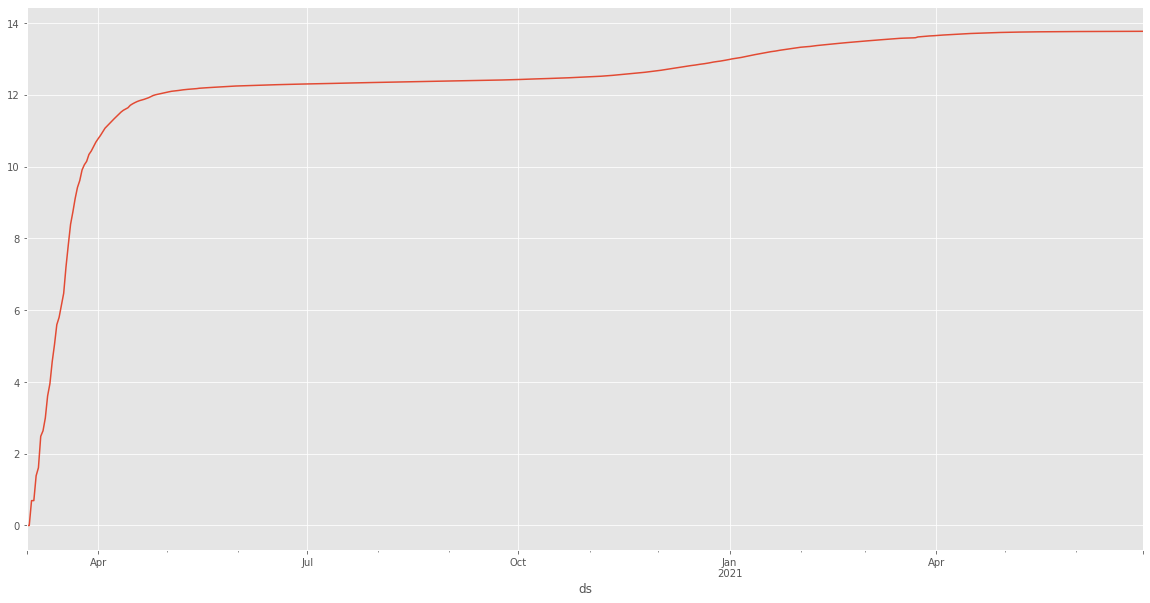

In [72]:
df1 = pd.read_csv('NYcases.csv', index_col='date', parse_dates=True)
df1 = df1.drop(['county','state','fips','cured'], axis =1)
df1 = df1.reset_index().rename(columns={'date':'ds', 'cases':'y'}) 
df1['y'] = np.log(df1['y'])
df1.set_index('ds').y.plot()
df1.head()

In [73]:
model = Prophet(yearly_seasonality = False, weekly_seasonality = False, daily_seasonality = True, changepoint_range = .9)
model.fit(df1);
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [74]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
512 2021-07-26  13.809544   13.386172   14.299935
513 2021-07-27  13.810399   13.359205   14.325191
514 2021-07-28  13.811254   13.311698   14.328728
515 2021-07-29  13.812109   13.296853   14.366024
516 2021-07-30  13.812964   13.240158   14.424836

In [75]:
forecast.sort_values('trend', ascending=False)[:10]
print(forecast[['ds', 'trend']].sort_values('trend', ascending=False)[:30])

            ds      trend
516 2021-07-30  14.154483
515 2021-07-29  14.153628
514 2021-07-28  14.152773
513 2021-07-27  14.151918
512 2021-07-26  14.151063
511 2021-07-25  14.150208
510 2021-07-24  14.149353
509 2021-07-23  14.148498
508 2021-07-22  14.147643
507 2021-07-21  14.146788
506 2021-07-20  14.145933
505 2021-07-19  14.145078
504 2021-07-18  14.144223
503 2021-07-17  14.143369
502 2021-07-16  14.142514
501 2021-07-15  14.141659
500 2021-07-14  14.140804
499 2021-07-13  14.139949
498 2021-07-12  14.139094
497 2021-07-11  14.138239
496 2021-07-10  14.137384
495 2021-07-09  14.136529
494 2021-07-08  14.135674
493 2021-07-07  14.134819
492 2021-07-06  14.133964
491 2021-07-05  14.133109
490 2021-07-04  14.132254
489 2021-07-03  14.131399
488 2021-07-02  14.130544
487 2021-07-01  14.129689


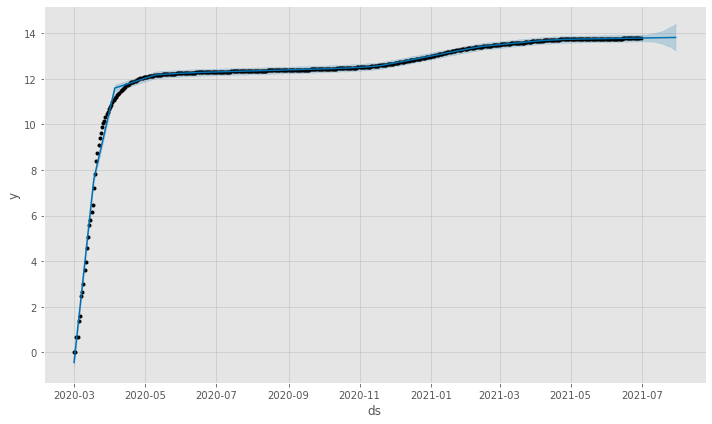

In [76]:
model.plot(forecast)

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [79]:
metric_df = forecast.set_index('ds')[['yhat']].join(df1.set_index('ds').y).reset_index()

In [80]:
metric_df.dropna(inplace=True)

In [81]:
r2_score(metric_df.y, metric_df.yhat)

0.9967249275951621

In [82]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.013125224818069893

In [83]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.0365681902410617

In [84]:
np.sqrt(np.mean((metric_df.y - metric_df.yhat)**2))

0.11456537355619234